In [59]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc, ndimage
from skimage import morphology

# 24. Segmentation of follicles

198.0


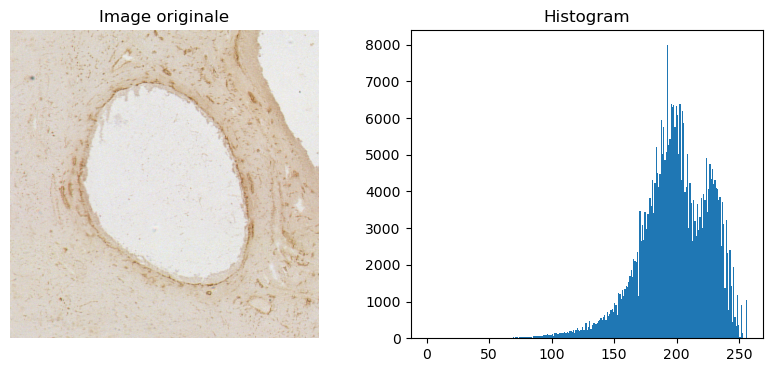

In [46]:
# Read images and display
follicule = iio.imread('images/follicule.bmp')

# Display images
_, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].imshow(follicule)
ax[0].set_title('Image originale')
ax[0].axis('off')
ax[1].hist(follicule[:,:,2].flatten(), 256, range=(0,256))
ax[1].set_title('Histogramme')
print(np.median(follicule[:,:,2].flatten()))


En réalisant l'histogramme des canaux, on constate que le canal bleu présente un meilleur contraste (histogramme étiré)

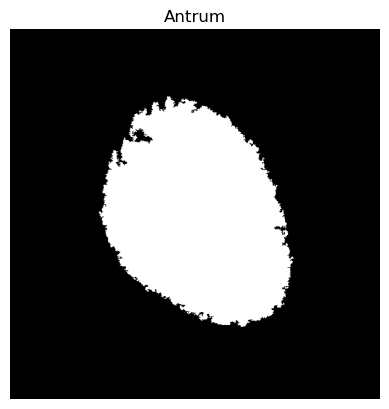

In [106]:
antrum = follicule[:,:,2] > 220
L = morphology.label(antrum, connectivity=2)            # Gets labeled array, where all connected regions are assigned the same integer value.
antrum = (L == L[300,300])                              # Isolates the central region
antrum = morphology.remove_small_objects(antrum,100)    
antrum = morphology.remove_small_holes(antrum,300)

plt.title('Antrum')
plt.axis('off')
plt.imshow(antrum, 'gray')     

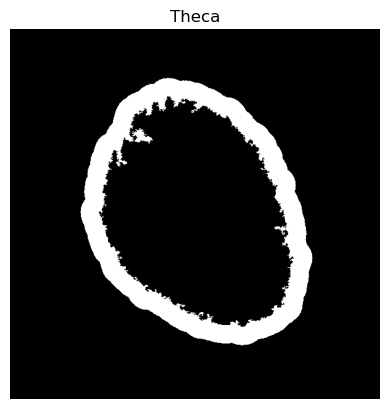

In [109]:
se40 = morphology.disk(30)                                  # Creates disk footprint of radius 30
theca = morphology.binary_dilation(antrum, footprint=se40)  # Dilates with the footprint disks
theca = theca ^ antrum                                      # Remove the antrum region

plt.title('Theca')
plt.axis('off')
plt.imshow(theca, 'gray')
plt.show()

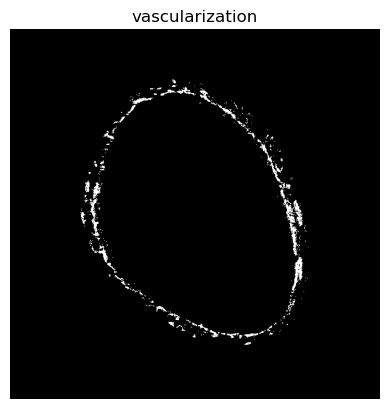

In [113]:
vascularization = follicule[:,:,2] < 140
vascularization = vascularization * theca
plt.imshow(vascularization, 'gray')
plt.title('vascularization')
plt.axis('off')
plt.show()

The granulosa cells have a low contrast, so it is diclut to use thresholding techniques. But we know they are
localized between the antrum and the vascularization. Nevertheless the vascularization is not a closed region
outside the antrum. Therefore, the proposed solution consits in rt trying to close the vascularization region
and taking the corona between this region and the antrum. The result is shown in Fig. 24.3.

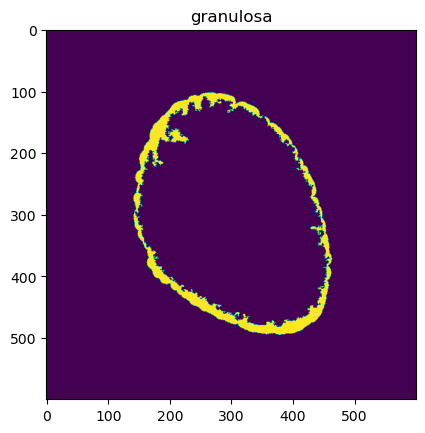

In [115]:
se10 = morphology.disk(10)
dil = 1-morphology.binary_closing(vascularization, se10)
L = morphology.label(dil, connectivity=1)
dil = L == L[300, 300]
granulosa = dil ^ antrum
plt.imshow(granulosa)
plt.title('granulosa')
plt.show()